In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
def sparsify(A):
    nnz = 0
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    ia = np.ones(m + 1)
    val = []
    ja = []
    for i in range(0, m):
        for j in range(0, n):
            if A[i][j] != 0:
                val.append(A[i][j])
                ja.append(j + 1)
                nnz = nnz + 1
        ia[i + 1] = nnz + 1
    ia = ia.astype(int)
    ja = np.array(ja)
    ja = ja.astype(int)
    return val, ja, ia 

In [4]:
A = [[7, 0, 0, 2], [2, 0, 1, 0], [3, 0, 0, 0]]
va, ja, ia = sparsify(A)
print(va, ja, ia)

[7, 2, 2, 1, 3] [1 4 1 3 1] [1 3 5 6]


In [5]:
net = [ia, ja, va]
print(net)

[array([1, 3, 5, 6]), array([1, 4, 1, 3, 1]), [7, 2, 2, 1, 3]]


In [6]:
csvfile = "test.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [7]:
a = np.load("A_matrix.npy")
A1 = np.eye(np.shape(a)[0], np.shape(a)[0])
A = np.hstack([a, A1])
print(np.shape(A))

(6590, 12879)


In [8]:
va, ja, ia = sparsify(A)
csvfile = "A_sparse.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [9]:
print(ia[np.shape(A)[0]])

483021


In [6]:
print(np.count_nonzero(A))

483020


In [10]:
At = np.transpose(A)
print(np.shape(At))

(12879, 6590)


In [8]:
va, ja, ia = sparsify(At)
csvfile = "At_sparse.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [9]:
print(ia[np.shape(At)[0]])
print(np.count_nonzero(At))

483021
483020


In [12]:
c = np.load("C_matrix.npy")
C = np.hstack([c, 0.0001*np.ones(np.shape(a)[0])])
np.savetxt("Ctxt.csv", C, delimiter = " ")

In [13]:
#initial Points
B = np.load("B_matrix.npy")
At = np.transpose(A)
AAtxx = np.dot(abs(A), abs(At))
AAt = np.dot(A, At)
x = np.dot(np.linalg.inv(AAt), B)
x = np.dot(At, x)
y = np.dot(A, C)
y = np.dot(np.linalg.inv(AAt),(y))
s = C - np.dot(At, y)

In [14]:
np.savetxt("x_initial.csv", x, delimiter = " ")
np.savetxt("y_initial.csv", y, delimiter = " ")
np.savetxt("s_initial.csv", s, delimiter = " ")

In [15]:
va, ja, ia = sparsify(AAtxx)
csvfile = "AAt_sparse.csv"
with open(csvfile, 'w') as output:
    writer = csv.writer(output, delimiter= " ", lineterminator = '\n')
    writer.writerow(ia)
    writer.writerow(ja)
    writer.writerow(va)

In [14]:
np.dot(x, s)

3.986803757352455e-20

In [15]:
print(np.count_nonzero(AAt))

2036312


In [16]:
print(np.count_nonzero(A))

483020


In [17]:
rd = np.dot(At, y)

In [18]:
print(rd)

[-2.23616698e-19  1.76182853e-19 -7.55976905e-19 ... -3.33333333e-06
 -3.33333333e-06 -3.33333333e-06]


In [19]:
np.savetxt("rd.txt", rd, delimiter = " ")

In [20]:
print(min(y), max(y))

-0.33333333333333504 -3.333333333332726e-06


In [21]:
d = np.dot(x, s)
print(d)

3.986803757352455e-20


In [22]:
rd = C - s - rd
print(rd)

[0. 0. 0. ... 0. 0. 0.]


In [23]:
print(max(rd), min(rd))

0.0 0.0


In [25]:
rp = B - np.dot(A, x)
print(rp)
print(max(rp), min(rp))

[-2.54109884e-21  4.23516474e-22  1.05879118e-22 ... -6.20385459e-25
  0.00000000e+00 -1.65436123e-24]
6.098637220230962e-20 -8.131516293641283e-20


In [27]:
rc = -1*np.multiply(x, s)
print(rc)
print(max(rc), min(rc))

[ 2.51351218e-29  1.98034293e-29 -3.25632319e-28 ...  2.09041071e-15
  2.09716527e-14  4.94447931e-15]
3.0446194196196473e-05 -3.0446194196196565e-05


In [7]:
n = len(x)
X = np.zeros((n, n))
S = np.zeros((n, n))
S_1 = np.zeros((n, n))
for j in range(0, n):
    X[j][j] = x[j]
    S[j][j] = s[j]
    ss = s[j]
    if abs(ss) < 1e-10:
        ss = 1e-10 
    S_1[j][j] = 1.0/ss
mu = np.dot(np.transpose(x), s)
mu = mu/n

print(mu)
rd = C - s - np.dot(np.transpose(A), y)
rp = B - np.dot(A, x)
rc = np.zeros(n)
for j in range(0, n):
    rc[j] = -1.0*x[j]*s[j]

D = S_1*X
ADA = np.dot(A, np.dot(D, np.transpose(A)))
AS = np.dot(A, S_1)
#dy_aff = -1.0 * np.dot(np.linalg.inv(ADA), np.dot(AS, rc) - np.dot(A, np.dot(D, rd)) - rp)
intm = np.dot(AS, rc) - np.dot(A, np.dot(D, rd)) - rp
print(intm)

3.0955848725463585e-24
[ 3.85809603e-06  1.94884957e-06 -1.40604686e-07 ...  6.27123213e-10
  6.29149578e-09  1.48334379e-09]


In [8]:
print(max(intm), min(intm))

9.133858258859484e-05 -9.133858258859485e-05


In [9]:
print(np.isnan(intm) == True)

[False False False ... False False False]


In [1]:
for i in np.isnan(intm):
    if i == True:
        print(i)

NameError: name 'np' is not defined

In [7]:
B = np.load("B_matrix.npy")
At = np.transpose(A)

In [17]:
x = 1e-10*np.ones(np.shape(At)[0])
for i  in range(np.count_nonzero(B), np.shape(At)[0]):
    x[i] = 0
print(np.shape(x))

(12879,)


In [18]:
xi = B - np.dot(A, x)
print(xi)

[-3.85808682e-06 -1.94882839e-06  1.40638990e-07 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [11]:
print(np.count_nonzero(B))

602


In [19]:
AAt = np.dot(A, At)
x = np.dot(np.linalg.inv(AAt), B)
x = np.dot(At, x)
print(min(x))

-9.133858258858951e-05


In [20]:
from scipy.optimize import nnls

In [21]:
x, rnorm = nnls(A, B)

In [41]:
x = x + 1e-10
print(min(x))

1e-10


In [42]:
print(max(x))
diff = B - np.dot(A, x)
print(max(diff), min(diff))

0.00018268027447553576
1e-10 -1e-10


In [26]:
s = 1e-8*np.zeros(np.shape(At)[0])
y = np.linalg.lstsq(At, C - s)[0]

/media/apk/84bd6553-82dd-4faa-9701-e84d64d75ed7/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [27]:
diff = C - s - np.dot(At, y)
print(max(diff), min(diff))

0.33333332335700017 -3.3333464857773875e-09


In [34]:
s = 0.3333*np.ones(np.shape(At)[0])


In [35]:
diff = C - s - np.dot(At, y)
print(max(diff), min(diff))

0.0 0.0


In [36]:
print(max(s), min(s))

1.0 0.0


In [37]:
for i in range(0, len(s)):
    if s[i] == 0.0:
        s[i] = 1e-10
y = np.linalg.solve(AAt, np.dot(A, C) - np.dot(A, s))
diff = C - s - np.dot(At, y)
print(max(diff), min(diff))

0.0 0.0


In [38]:
print(max(y), min(y))

0.0 0.0


In [39]:
print(max(s), min(s))

1.0 1e-10


In [43]:
np.savetxt("x_initial.csv", x, delimiter = " ")
np.savetxt("y_initial.csv", y, delimiter = " ")
np.savetxt("s_initial.csv", s, delimiter = " ")

In [16]:
deltax = max(-1.5*min(x), 0)
deltas = max(-1.5*min(s), 0)

deltaxx = deltax + 0.5*(np.dot(np.transpose(x + deltax), (s + deltas)))/(np.sum(s + deltas))
deltass = deltas + 0.5*(np.dot(np.transpose(x + deltax), (s + deltas)))/(np.sum(x + deltax))

In [17]:
x = x + deltaxx
s = s + deltass

print(min(x), min(s))

0.00011417322823573686 0.011712435735201239


In [18]:
print(np.max(B - np.dot(A, x)), np.min(B - np.dot(A, x)))

0.0002055118108243264 -0.00020551181082432637


In [19]:
np.savetxt("x_initial.csv", x, delimiter = " ")
np.savetxt("y_initial.csv", y, delimiter = " ")
np.savetxt("s_initial.csv", s, delimiter = " ")

In [8]:
x_upd = np.loadtxt('x_upd.txt')

In [40]:
print(np.max(x_upd), np.min(x_upd))

0.746835 2.20882e-08


In [41]:
s_upd = np.loadtxt('s_upd.txt')
print(np.max(s_upd), np.min(s_upd))

0.831133 1.16902e-08


In [42]:
i = np.where(x_upd > 1)
mx_loc = np.where(x_upd == max(x_upd))
print(i, mx_loc)

(array([], dtype=int64),) (array([11757]),)


In [43]:
print(np.shape(np.where(s > 1e-1)))

(1, 903)


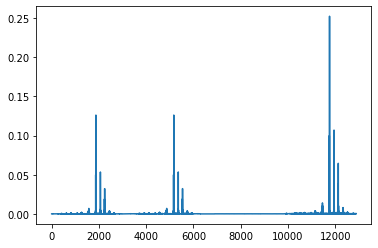

In [12]:
limit = 12879
plt.plot(np.arange(0, limit), x_upd[:limit])

In [1]:
print(np.count_nonzero(AAtxx))

NameError: name 'np' is not defined